In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gti-upm/leapgestrecog")

print("Path to dataset files:", path)

100%|██████████| 2.13G/2.13G [00:25<00:00, 89.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_path = "/root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapGestRecog"
classes = sorted(os.listdir(data_path))[:10]  # Only 10 gesture classes
X, y = [], []

for label, gesture in enumerate(classes):
    folder = os.path.join(data_path, gesture)
    for subject in os.listdir(folder):
        subject_path = os.path.join(folder, subject)
        for img_file in os.listdir(subject_path):
            img_path = os.path.join(subject_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))
            X.append(img)
            y.append(label)

X = np.array(X).reshape(-1, 64, 64, 1) / 255.0
y = np.array(y)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 84s 163ms/step - accuracy: 0.7603 - loss: 0.7117 - val_accuracy: 0.9923 - val_loss: 0.0234
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step - accuracy: 0.9913 - loss: 0.0258 - val_accuracy: 0.9912 - val_loss: 0.0210
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 162ms/step - accuracy: 0.9915 - loss: 0.0186 - val_accuracy: 0.9908 - val_loss: 0.0146
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 162ms/step - accuracy: 0.9933 - loss: 0.0149 - val_accuracy: 0.9915 - val_loss: 0.0142
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 164ms/step - accuracy: 0.9915 - loss: 0.0138 - val_accuracy: 0.9893 - val_loss: 0.0155
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 160ms/step - accuracy: 0.9923 - loss: 0.0147 - val_accuracy: 0.9925 - val_loss: 0.0159
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 80s 159ms/step - accuracy: 0.9867 - loss: 0.0377 - val_accuracy: 0.9920 - val_loss: 0.0142
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 161ms/step - accuracy: 0.9917 - loss:

In [6]:
model.save("hand_gesture_model.keras")
pred = model.predict(np.expand_dims(x_test[0], axis=0))
print("Predicted class:", np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted class: 5


In [7]:
class_names = sorted(os.listdir(data_path))[:10]
print("Predicted gesture:", class_names[np.argmax(pred)])

Predicted gesture: 05


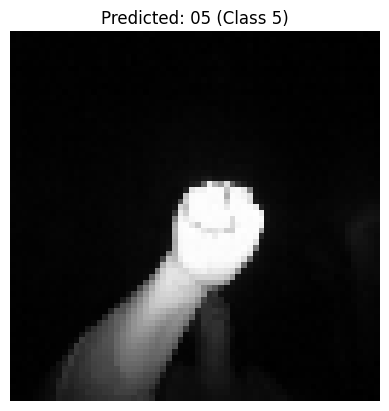

In [8]:

import matplotlib.pyplot as plt

# Get the predicted class
pred_class = np.argmax(pred)

# Optional: Get actual gesture names (folder names)
class_names = sorted(os.listdir(data_path))[:10]

# Show the image
plt.imshow(x_test[0].reshape(64, 64), cmap='gray')
plt.title(f"Predicted: {class_names[pred_class]} (Class {pred_class})")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


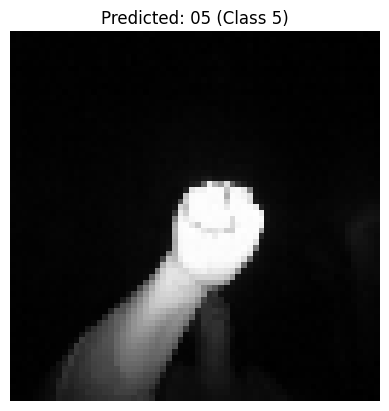

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


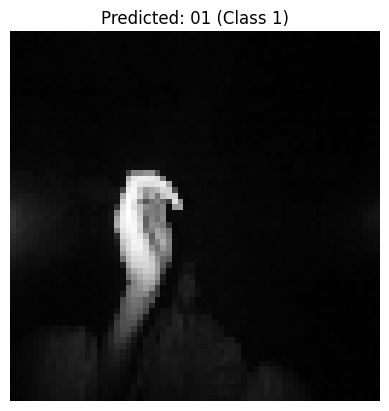

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


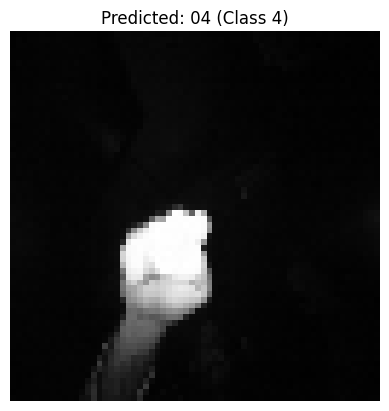

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


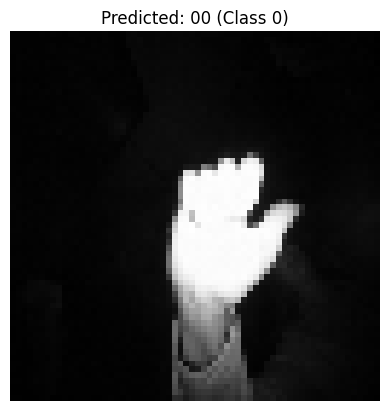

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


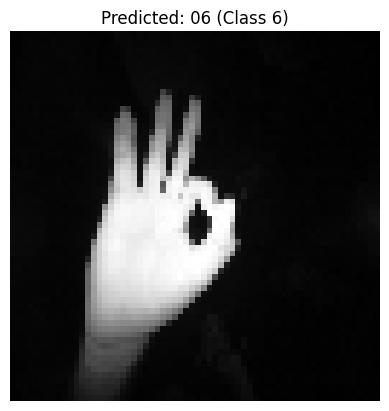

In [9]:

for i in range(5):
    img = x_test[i]
    pred = model.predict(np.expand_dims(img, axis=0))
    pred_class = np.argmax(pred)

    plt.imshow(img.reshape(64, 64), cmap='gray')
    plt.title(f"Predicted: {class_names[pred_class]} (Class {pred_class})")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


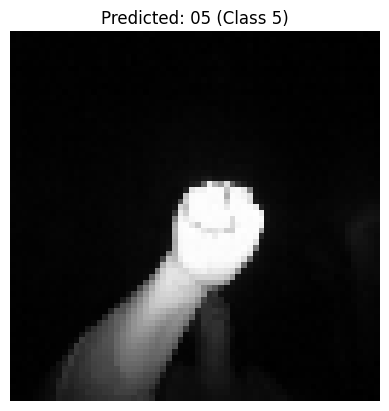

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


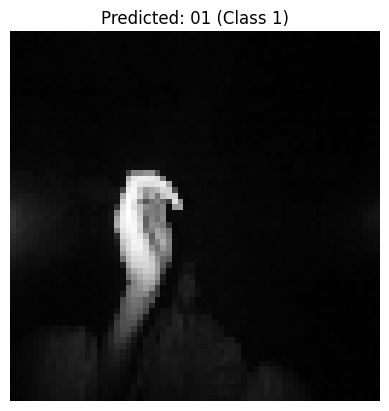

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


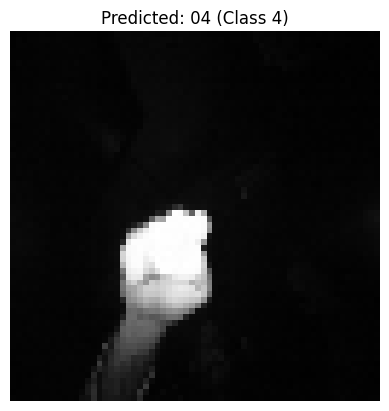

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


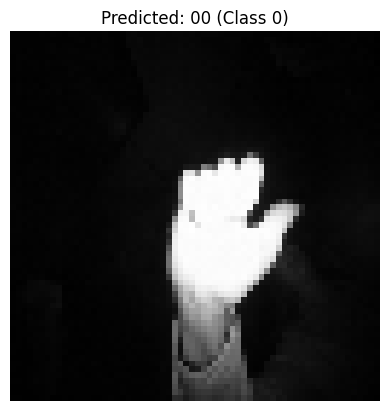

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


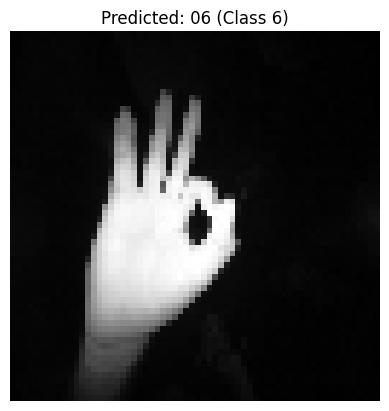

In [10]:
import matplotlib.pyplot as plt

class_names = sorted(os.listdir(data_path))[:10]

# Visualize 5 test images with predictions
for i in range(5):
    img = x_test[i]
    pred = model.predict(np.expand_dims(img, axis=0))
    pred_class = np.argmax(pred)

    plt.imshow(img.reshape(64, 64), cmap='gray')
    plt.title(f"Predicted: {class_names[pred_class]} (Class {pred_class})")
    plt.axis('off')
    plt.show()


In [11]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 78s 156ms/step - accuracy: 0.9916 - loss: 0.0138 - val_accuracy: 0.9920 - val_loss: 0.0160
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 156ms/step - accuracy: 0.9931 - loss: 0.0123 - val_accuracy: 0.9918 - val_loss: 0.0149
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 80s 160ms/step - accuracy: 0.9926 - loss: 0.0135 - val_accuracy: 0.9927 - val_loss: 0.0134
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 79s 154ms/step - accuracy: 0.9933 - loss: 0.0110 - val_accuracy: 0.9800 - val_loss: 0.0721
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 155ms/step - accuracy: 0.9889 - loss: 0.0251 - val_accuracy: 0.9915 - val_loss: 0.0140
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 158ms/step - accuracy: 0.9916 - loss: 0.0118 - val_accuracy: 0.9900 - val_loss: 0.0147
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 78s 157ms/step - accuracy: 0.9928 - loss: 0.0108 - val_accuracy: 0.9877 - val_loss: 0.0153
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 87s 166ms/step - accuracy: 0.9934 - loss: 0

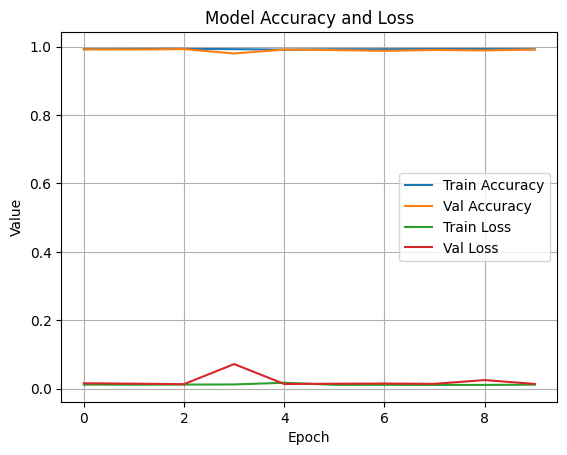

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.grid()
plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step


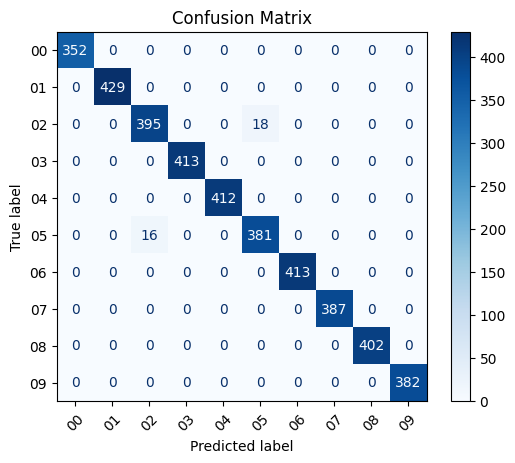

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()